#                                                      Crop Recommendation System using Machine Learning


## Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

import joblib


## Import scikit-learn


In [3]:
# !pip install scikit-learn
# !pip show scikit-learn

## Load dataset


In [4]:
df = pd.read_csv("C:/JUPYTERPROJECTS/Crop_Advisory_system/data/Crop_recommendation.csv")
df.head()



,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## Exploratory Data Analysis (EDA)

In [5]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])


## Outlier Detection

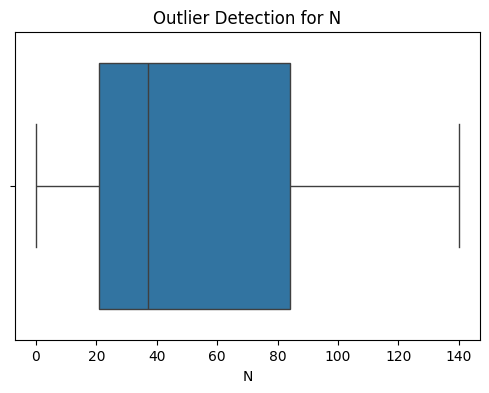

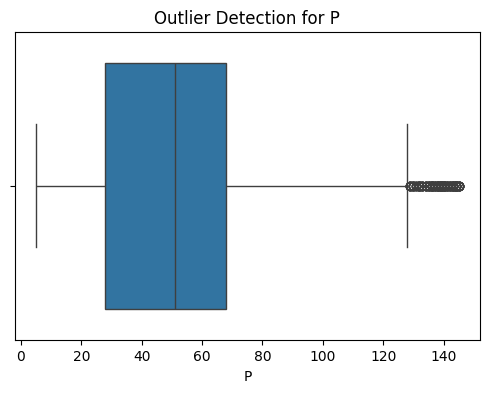

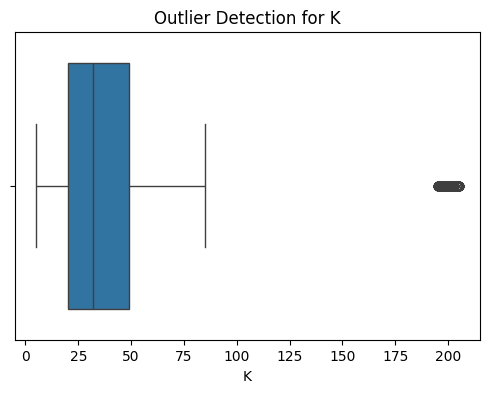

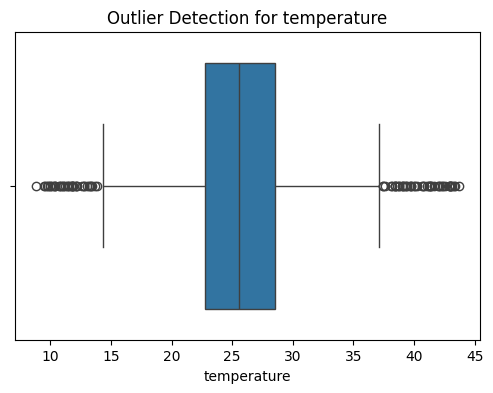

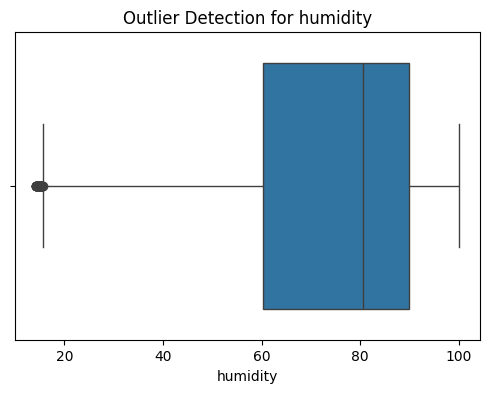

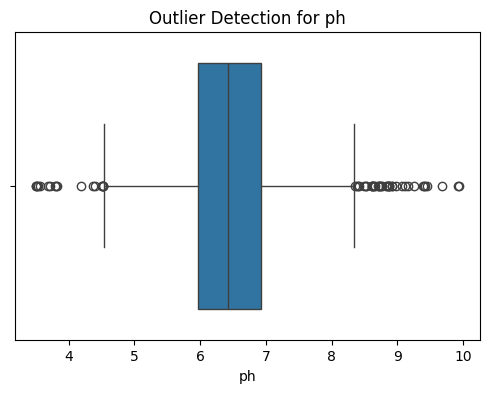

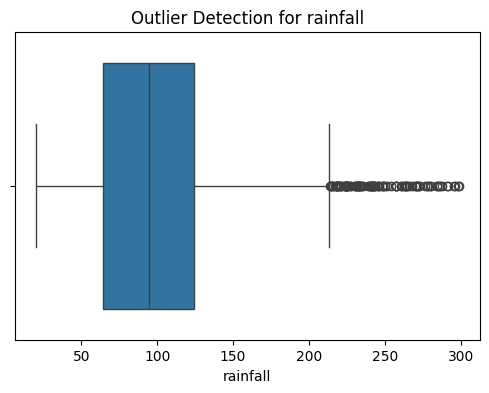

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in numeric_df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=numeric_df[column])
    plt.title(f"Outlier Detection for {column}")
    plt.show()


### Boxplot for outlier detection


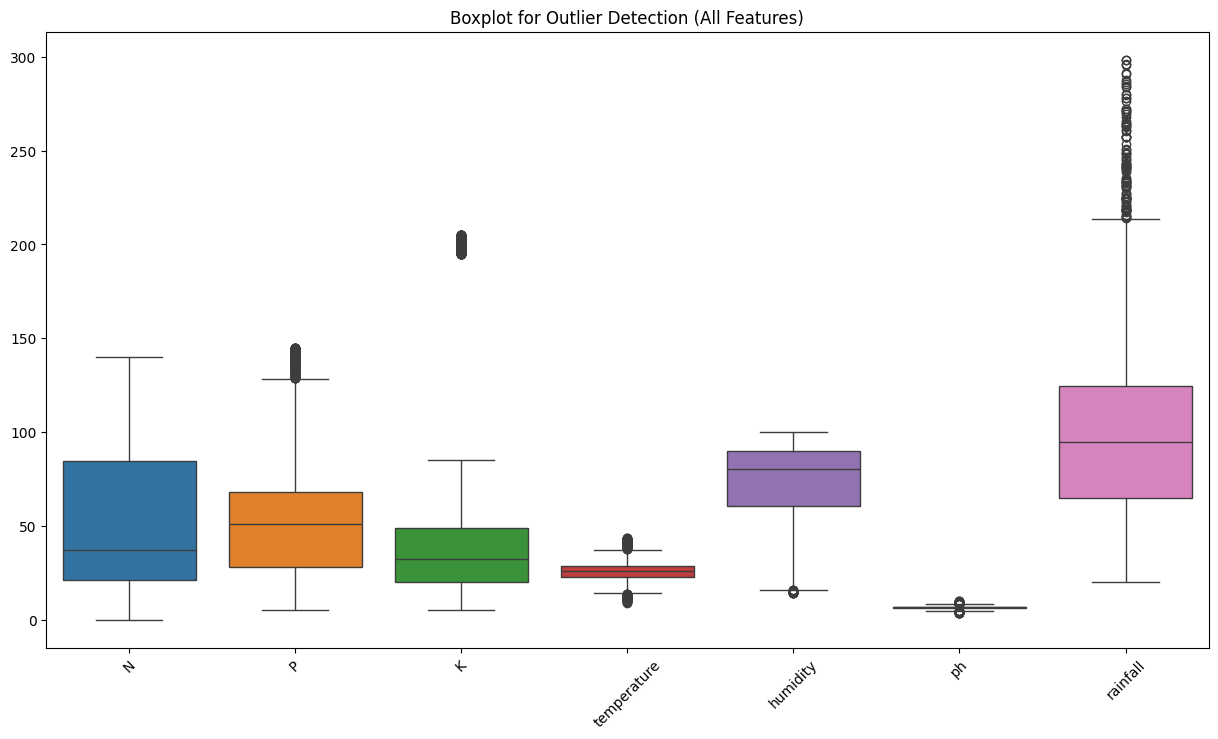

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(15,8))
sns.boxplot(data=numeric_df)
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection (All Features)")
plt.show()


### Formula for outlier detection

In [9]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Outlier Detection using IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | 
            (numeric_df > (Q3 + 1.5 * IQR)))

print("Number of outliers in each column:")
print(outliers.sum())


Number of outliers in each column:
N                0
P              138
K              200
temperature     86
humidity        30
ph              57
rainfall       100
dtype: int64


In [10]:
#manually encoding

#crop_dict = {
    # 'rice': 1,
    # 'maize': 2,
    # 'jute': 3,
    # 'cotton': 4,
    # 'coconut': 5,
    # 'papaya': 6,
    # 'orange': 7,
    # 'apple': 8,
    # 'muskmelon': 9,
    # 'watermelon': 10,
    # 'grapes': 11,
    # 'mango': 12,
    # 'banana': 13,
    # 'pomegranate': 14,
    # 'lentil': 15,
    # 'blackgram': 16,
    # 'mungbean': 17,
    # 'mothbeans': 18,
    # 'pigeonpeas': 19,
    # 'kidneybeans': 20,
    # 'chickpea': 21,
    # 'coffee': 22
#}
#df['label_encoded']=  df['label'].map(crop_dict)

# Label Encoding

In [11]:
#automatic encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

# Display encoding map
Crop_dict = dict(zip(le.classes_, le.transform(le.classes_)))
print(Crop_dict)


{'apple': np.int64(0), 'banana': np.int64(1), 'blackgram': np.int64(2), 'chickpea': np.int64(3), 'coconut': np.int64(4), 'coffee': np.int64(5), 'cotton': np.int64(6), 'grapes': np.int64(7), 'jute': np.int64(8), 'kidneybeans': np.int64(9), 'lentil': np.int64(10), 'maize': np.int64(11), 'mango': np.int64(12), 'mothbeans': np.int64(13), 'mungbean': np.int64(14), 'muskmelon': np.int64(15), 'orange': np.int64(16), 'papaya': np.int64(17), 'pigeonpeas': np.int64(18), 'pomegranate': np.int64(19), 'rice': np.int64(20), 'watermelon': np.int64(21)}


In [12]:
#df[['label', 'label_encoded']].head(10)

###  parameters(rows & coloumn)

In [13]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,label_encoded
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,5


In [14]:
label_df = pd.DataFrame(list(Crop_dict.items()), columns=['Crop_Name', 'Label_Encoded'])
label_df


,Crop_Name,Label_Encoded
0,apple,0
1,banana,1
2,blackgram,2
3,chickpea,3
4,coconut,4
5,coffee,5
6,cotton,6
7,grapes,7
8,jute,8
9,kidneybeans,9


## Feature and Target Separation


In [15]:
X = df.drop(['label', 'label_encoded'], axis=1)  # input features
Y = df['label_encoded']                          # target (numeric)


In [16]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [17]:
Y

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: label_encoded, Length: 2200, dtype: int64

## Splitting the Dataset


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (1760, 7)
Testing set size: (440, 7)


In [19]:
X_train


,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


## scaling(optional)

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Model Training – Random Forest Classifier


In [21]:
# ==============================
# Final Model: Random Forest
# ==============================

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize Model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    random_state=42
)

# Train Model
rf_model.fit(X_train_scaled, Y_train)

# Make Predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate Model
accuracy = accuracy_score(Y_test, y_pred)

print("Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n")
print(classification_report(Y_test, y_pred))


Model Performance:
Accuracy: 0.9932

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1

## Confusion Matrix- Random Forest

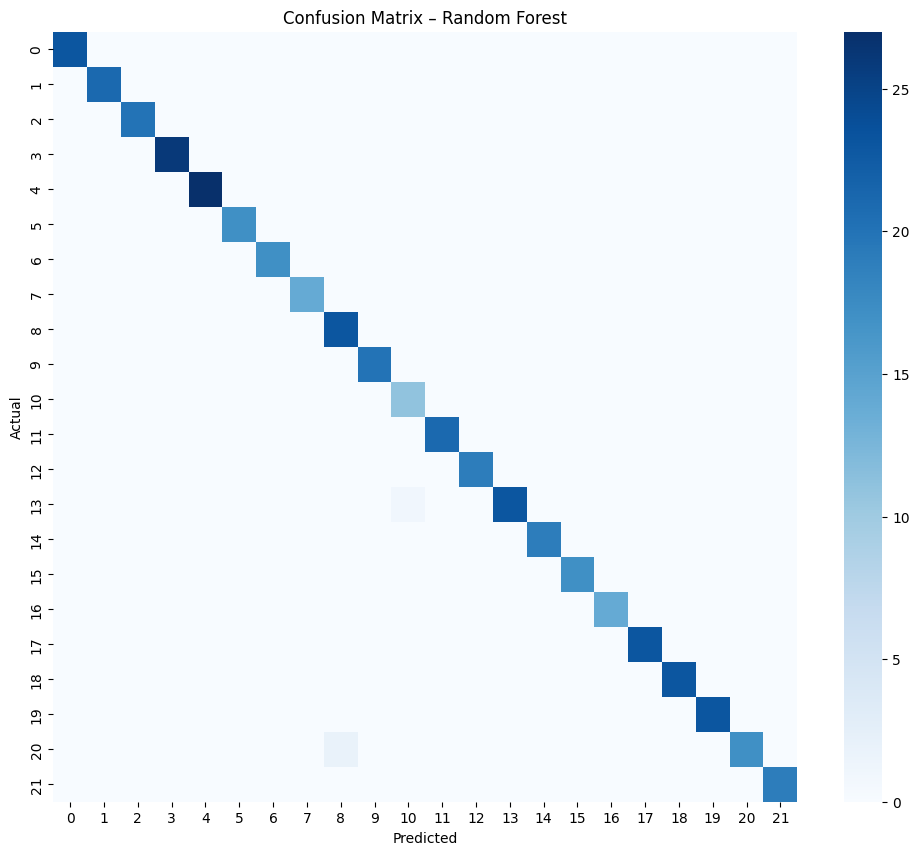

In [22]:
## Confusion Matrix – Final Model

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(12,10))
sns.heatmap(cm, cmap="Blues")
plt.title("Confusion Matrix – Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [23]:
## Feature Importance

importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

importance_df


,Feature,Importance
6,rainfall,0.227036
4,humidity,0.211279
2,K,0.181222
1,P,0.143622
0,N,0.108859
3,temperature,0.075682
5,ph,0.052301


## Feature Importance -Random Forest

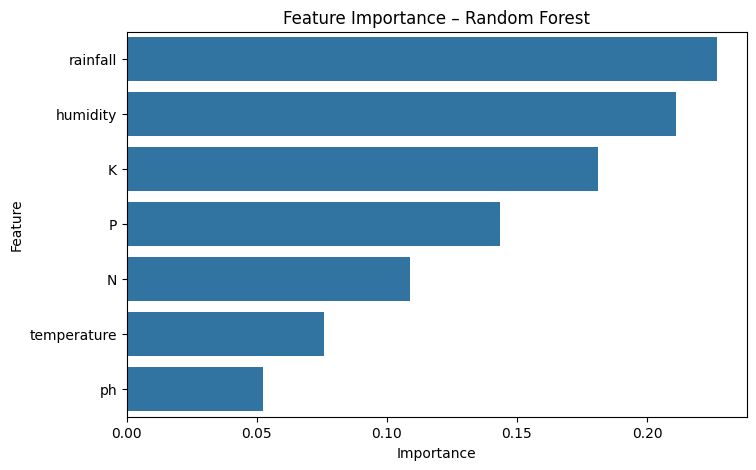

In [24]:
plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importance – Random Forest")
plt.show()


## Top 3 Crop Recommendation System


In [25]:
## Top 3 Crop Recommendation System

import numpy as np
def confidence_label(prob):
    if prob >= 0.85:
        return "Very High"
    elif prob >= 0.60:
        return "High"
    elif prob >= 0.40:
        return "Moderate"
    else:
        return "Low"

def recommend_top3(N, P, K, temperature, humidity, ph, rainfall):
    
    # Prepare input
    features = pd.DataFrame([[N, P, K, temperature, humidity, ph, rainfall]],
                        columns=X.columns)
    
    # Scale input
    features_scaled = scaler.transform(features)
    
    # Get probabilities for all crops
    probabilities = rf_model.predict_proba(features_scaled)[0]
    
    # Get top 3 crop indices
    top3_indices = np.argsort(probabilities)[-3:][::-1]
    
    # Convert to crop names
    top3_crops = le.inverse_transform(top3_indices)
    
    # Get probability values
    top3_probs = probabilities[top3_indices]

    result_df = pd.DataFrame({
        "Rank": range(1, len(top3_crops) + 1),
        "Crop Name": top3_crops,
        "Probability": np.round(top3_probs, 3),
       "Confidence (%)": np.round(top3_probs * 100, 2)
    })
    
    result_df["Confidence Level"] = result_df["Probability"].apply(confidence_label)
    
    return result_df


## SAMPLE INPUT 

In [26]:
## input 1

recommend_top3(90, 42, 43, 20.8, 82.0, 6.5, 202.9)

# print("Top 3 Recommended Crops:")
# for crop, prob in results:
#     print(f"{crop} → {prob*100:.2f}% confidence")


,Rank,Crop Name,Probability,Confidence (%),Confidence Level
0,1,rice,0.99,99.0,Very High
1,2,jute,0.01,1.0,Low
2,3,pomegranate,0.00,0.0,Low


In [28]:
#input 2
recommend_top3(10, 45, 40, 20, 79, 6.8, 190)



,Rank,Crop Name,Probability,Confidence (%),Confidence Level
0,1,papaya,0.23,23.0,Low
1,2,pomegranate,0.23,23.0,Low
2,3,rice,0.18,18.0,Low


In [29]:
#input 3

recommend_top3(65, 20, 50, 30, 60, 6.5, 180)


,Rank,Crop Name,Probability,Confidence (%),Confidence Level
0,1,coffee,0.56,56.0,Moderate
1,2,jute,0.12,12.0,Low
2,3,papaya,0.07,7.0,Low


## Model Evaluation


In [30]:

print("\nClassification Report:\n", classification_report(Y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
  

## Saving the Trained Model


In [31]:
import os
os.getcwd()


'C:\\JUPYTERPROJECTS\\Crop_Advisory_system\\notebooks'

In [32]:
import joblib
import os

os.makedirs("../models", exist_ok=True)

joblib.dump(rf_model, "../models/crop_recommendation_model.pkl")
joblib.dump(scaler, "../models/scaler.pkl")
joblib.dump(le, "../models/label_encoder.pkl")


['../models/label_encoder.pkl']

In [65]:
# def recommendation(N, P, K, temperature, humidity, ph, rainfall):
#     features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
#     transformed_features = scaler.transform(features)   # ONLY transform
#     prediction = rf.predict(transformed_features)
#     crop = le.inverse_transform(prediction)
#     return crop[0]
